# SQL Alchemy Assignment - Rori Cooper

In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

## Step 1 - Climate Analysis and Exploration

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Call inspector
inspector = inspect(engine)
inspector

In [11]:
# Update Base name to Schema
schema = Base
schema.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [12]:
# View data in table
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print( table_name,": ", column.get('name'), ", ", column.get('type'))

measurement :  id ,  INTEGER
measurement :  station ,  TEXT
measurement :  date ,  TEXT
measurement :  prcp ,  FLOAT
measurement :  tobs ,  FLOAT
station :  id ,  INTEGER
station :  station ,  TEXT
station :  name ,  TEXT
station :  latitude ,  FLOAT
station :  longitude ,  FLOAT
station :  elevation ,  FLOAT


# Exploratory Climate Analysis

## Precipitation Analysis

In [13]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results

In [14]:
# Obtain last date in dataset
end_period = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#end_period
end_date = str(end_period)[2:-3]
end_date

'2017-08-23'

In [15]:
# Calculate the date 1 year ago from today
start_period = str(eval(end_date[0:4])-1) + end_date[4:]
start_period

'2016-08-23'

In [16]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
precip_data = session.query(*sel).\
    filter((Measurement.date > start_period)).all()

precip_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [17]:
# Set dataframe
df_precip = pd.DataFrame(precip_data, columns=['date','prcp'])
df_precip['date'] = pd.to_datetime(df_precip['date'], format='%Y/%m/%d')
df_precip.sort_values(by=['date'])
df_precip.head()
df_precip.to_csv('df_precip.csv')

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precip = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])
df_precip.set_index('Date', inplace=True)
df_precip.dropna(inplace=True)
df_precip.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [19]:
# Grouping and sorting dataframe (SUM)
year_of_precip = pd.DataFrame(df_precip.groupby(["Date"]).sum())
year_of_precip=pd.DataFrame(year_of_precip)
year_of_precip
year_of_precip.describe()
year_of_precip.sort_values(by=['Date'])
year_of_precip.head()
year_of_precip.to_csv('year_of_precip.csv')

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
year_of_precip.plot(use_index=True, y='Precipitation', figsize=(9,3))
plt.title("Total Daily Precipitation", fontweight='bold',size=11)
plt.xlabel("Date from %s to %s" %(start_period,end_date), fontweight='bold', size=8)
plt.ylabel("Measured in Inches", fontweight='bold', size=8)
plt.yticks(size=8)
plt.savefig('Year_of_Precip.png')
plt.show()

<IPython.core.display.Javascript object>

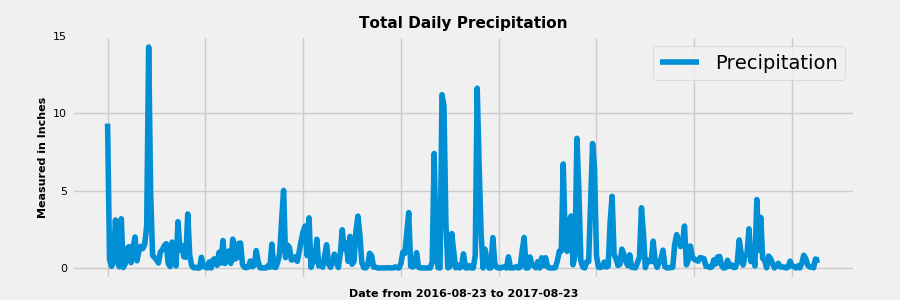

In [21]:
# Use Pandas to calcualte the summary statistics for the TOTAL precipitation data
year_of_precip.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [22]:
# Grouping and sorting dataframe (MEAN)
year_of_precip2 = pd.DataFrame(df_precip.mean())
year_of_precip2=pd.DataFrame(year_of_precip)
year_of_precip2
year_of_precip2.describe()
year_of_precip2.sort_values(by=['Date'])
year_of_precip2 = pd.DataFrame(df_precip.groupby(["Date"]).mean())
year_of_precip2.head()
year_of_precip2.to_csv('year_of_precip2.csv')

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
year_of_precip2.plot(use_index=True, y='Precipitation', figsize=(9,3))
plt.title("Average Daily Precipitation", fontweight='bold',size=11)
plt.xlabel("Date Range from %s to %s" %(start_period,end_date), fontweight='bold', size=8)
plt.ylabel("Measured in Inches", fontweight='bold', size=8)
plt.yticks(size=8)
plt.savefig('Year_of_Precip2.png')
plt.show()

<IPython.core.display.Javascript object>

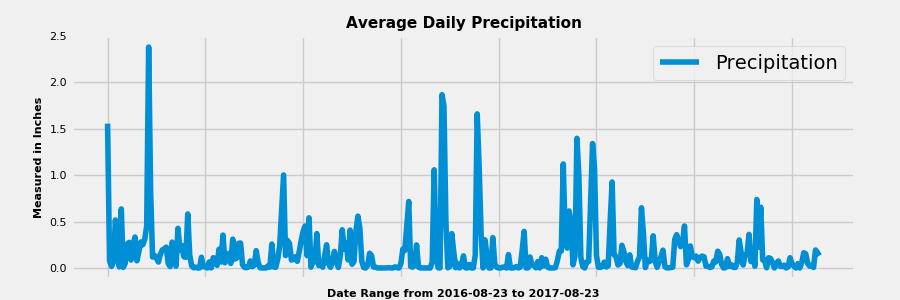

In [24]:
# Use Pandas to calcualte the summary statistics for the AVERAGE precipitation data
year_of_precip2.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [25]:
# after summing precipitation, realized totals were too high and went back and reran as averages. 

## Station Analysis

In [26]:
# inspect again
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print( table_name,": ", column.get('name'), ", ", column.get('type'))


measurement :  id ,  INTEGER
measurement :  station ,  TEXT
measurement :  date ,  TEXT
measurement :  prcp ,  FLOAT
measurement :  tobs ,  FLOAT
station :  id ,  INTEGER
station :  station ,  TEXT
station :  name ,  TEXT
station :  latitude ,  FLOAT
station :  longitude ,  FLOAT
station :  elevation ,  FLOAT


In [27]:
# How many stations are available in this dataset?
stations = session.query(Station.id,Station.station,Station.name)
print(f"Total stations in dataset = {stations.count()}.")

Total stations in dataset = 9.


In [28]:
# What are the most active stations?
most_active = session.query(Station.station,func.count(Measurement.date).label('total observations')).\
filter(Station.station == Measurement.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()


# set dataframe and display top 3 stations
df_most_active = pd.DataFrame(most_active)
df_most_active.head(3)

,station,total observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709


In [29]:
# List the stations and the counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
for row in station_list:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
t = session.query(Station.id,Station.name,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == Station.station).filter(Measurement.station == "USC00519281")
avg_temp = "{0:.1f}".format(t[0][4])
print(f"Lowest temp recorded: {t[0][2]}, Highest temp recorded: {t[0][3]}, Average temp recorded: {avg_temp}")

Lowest temp recorded: 54.0, Highest temp recorded: 85.0, Average temp recorded: 71.7


In [31]:
# Choose the station with the highest number of temperature observations.
df_most_active = pd.DataFrame(most_active)
df_most_active.head(1)

,station,total observations
0,USC00519281,2772


In [32]:
# Query the last 12 months of temperature observation data for this station: 
obs_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date > start_period)\
    .filter(Measurement.station == "USC00519281")\
    .order_by(Measurement.tobs).all()

# display to review df:
obs_df = pd.DataFrame(obs_data, columns=['date','tobs'])
obs_df.to_csv('obs_df.csv')
obs_df

,date,tobs
0,2017-02-02,59.0
1,2017-02-08,59.0
2,2017-02-09,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0
5,2017-02-25,61.0
6,2016-12-15,62.0
7,2017-01-06,62.0
8,2017-01-09,62.0
9,2017-01-10,62.0


In [33]:
# create the dataframe and set date as the index
obs_df = pd.DataFrame(obs_df, columns = ["date", "tobs"])
obs_df.set_index('date', inplace=True)
obs_df.head()

,tobs
date,
2017-02-02,59.0
2017-02-08,59.0
2017-02-09,59.0
2017-02-03,60.0
2017-04-30,60.0


In [34]:
# and plot the results as a histogram
plt.subplots(figsize=(9,3))

plt.hist(obs_df['tobs'], bins=12, color="mediumblue", alpha=.7)
plt.title(f"Station USC00519281 Temp. History from {start_period} to {end_date}", fontweight='bold',fontsize=11)
plt.xlabel('Temperature',fontweight='bold', fontsize=8)
plt.ylabel('Frequency', fontweight='bold',fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
labels = ['observation data (tobs)']
plt.legend(labels)
plt.tight_layout()
plt.savefig('USC00519281_histogram.png')
plt.show()

<IPython.core.display.Javascript object>

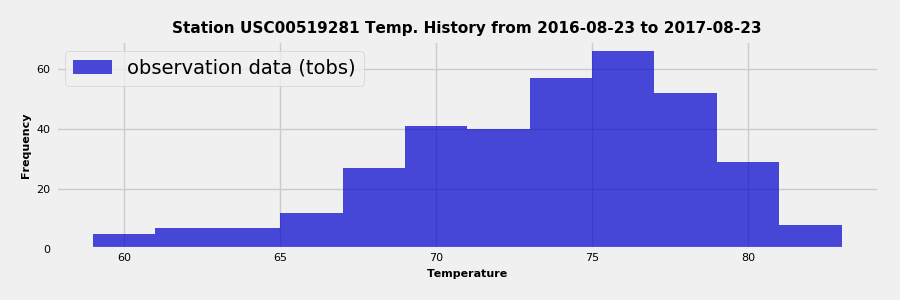

## Step 2 - Climate App

In [35]:
# Use FLASK to create your routes
from flask import Flask, json, jsonify

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

from werkzeug.wrappers import Request, Response

In [36]:
#################################################
# Flask Setup
#################################################
app = Flask(__name__)

In [37]:
# #################################################
# # Flask Routes
# #################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (f"Welcome to Rori's Climate App! <br><br/>"
        f"A. This page will query for the dates and temperatures observed in 2017:   <br/>"
        f"   /api/v1.0/precipitation/ <br><br/>" 
        f"B. This page is a list of stations in the dataset:    <br/>"
        f" /api/v1.0/stations/ <br><br/>" 
        f"C. This page will query the Temperature Observations (tobs) recorded in 2017:  <br/>"
        f" /api/v1.0/tobs/ <br><br/>"
        f"Enter your own data values for the following: <br><br/>"
        f"D. After api/v1.0/<start>, type a date formatted as 'yyyy-mm-dd' and this page will query and calculate the Min, Max, and Average Temperature for the date provided:  <br/>"
        f" /api/v1.0/'start'/ <br><br/>" 
        f"E. After api/v1.0/, type start and end dates formatted as 'yyyy-mm-dd'/'yyyy-mm-dd' and this page will query and calculate the Min, Max, and Average Temperature for the date range provided: <br/>"
        f" /api/v1.0/'start'/'end'/")        

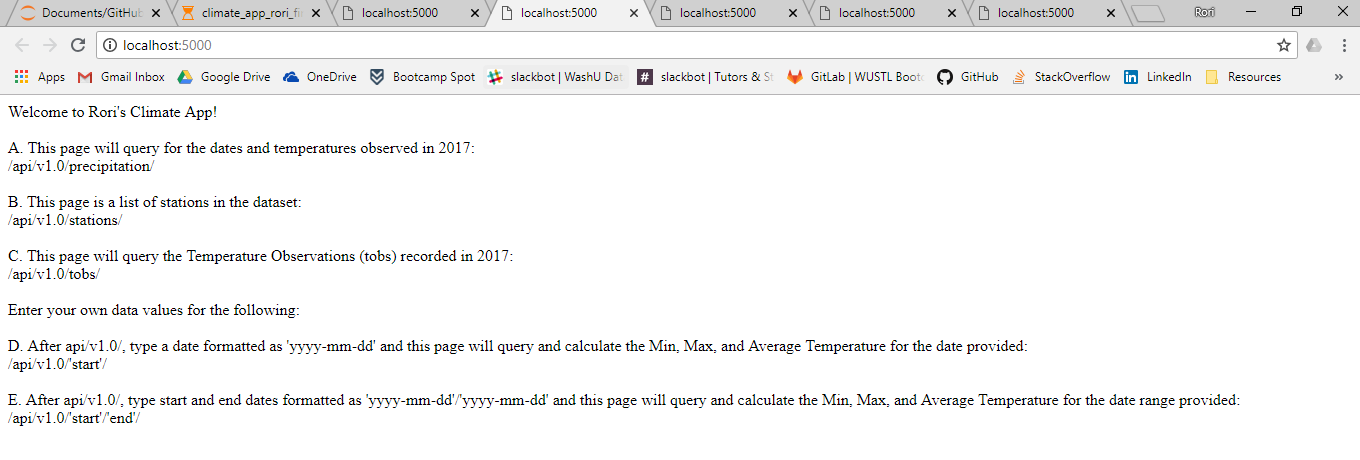

In [38]:
# A
# Query dates and tobs for 2017 
@app.route('/api/v1.0/precipitation/')
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= '2017-01-01').all()
    p_dict = dict(prcp_results)
    print()
    print("Results for Page A:")
    return jsonify(p_dict)

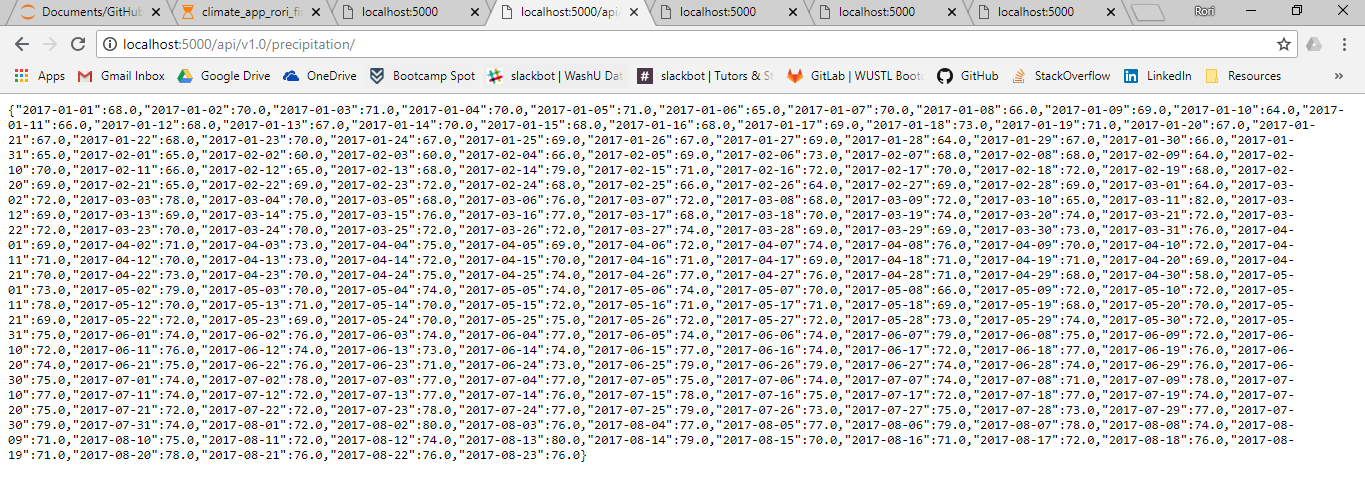

In [39]:
# B
# Query summary list of stations in dataset
@app.route('/api/v1.0/stations/')
def stations():
    station_list = session.query(Station.station)\
    .order_by(Station.station).all() 
    print()
    print("Results for Page B:")   
    for row in station_list:
        print (row[0])
    return jsonify(station_list)

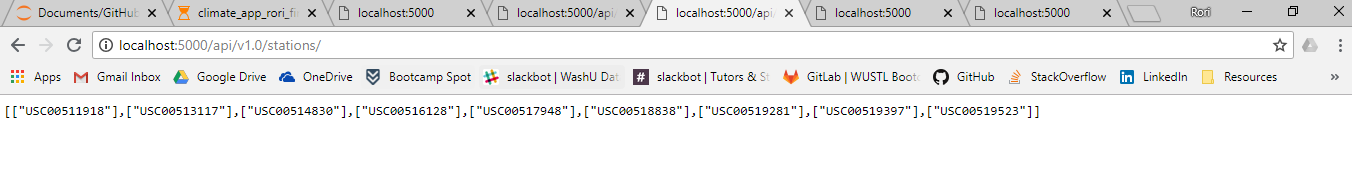

In [40]:
# C
# Query Measurements for 2017 tobs
@app.route('/api/v1.0/tobs/')
def tobs():
    temp_obs = session.query(Measurement.tobs)\
    .order_by(Measurement.date >='2017-01-01').all()
    print()
    print("Results for Page C:")
    return jsonify(temp_obs)

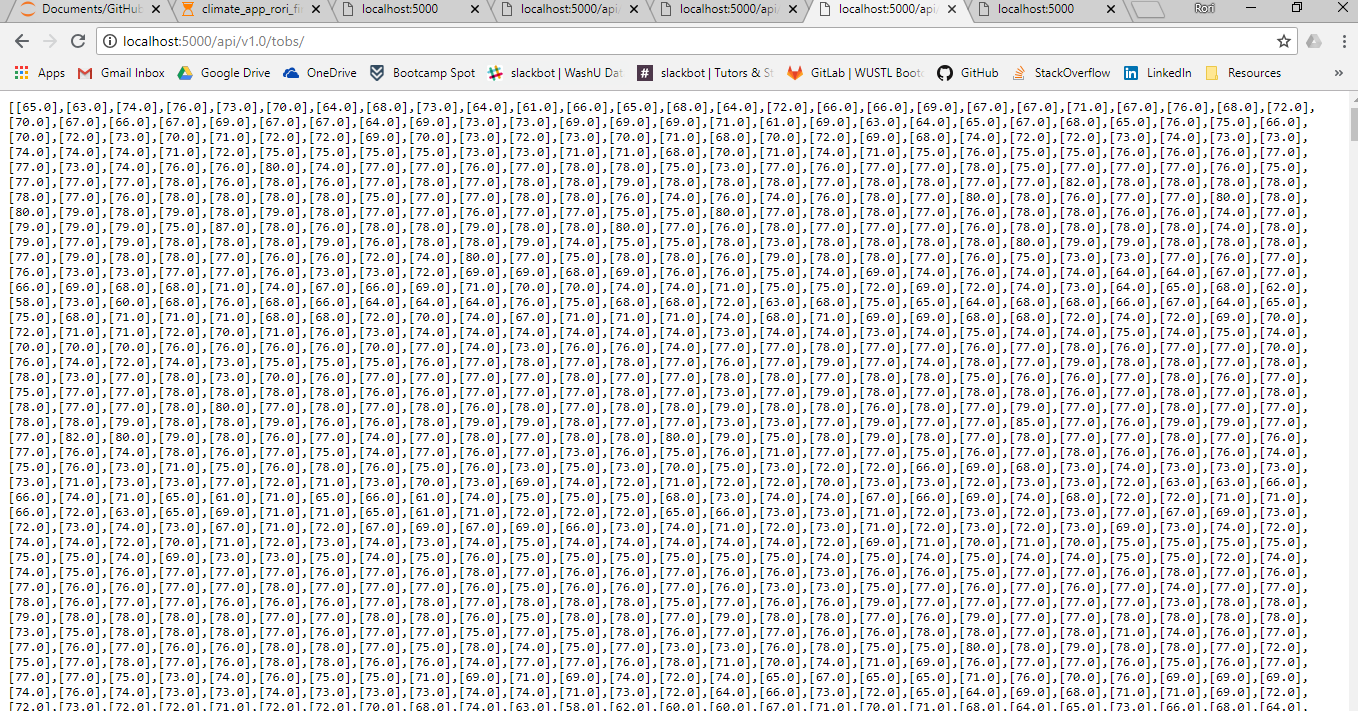

In [41]:
# D
# Query Measurements for provided start date
@app.route('/api/v1.0/<start>/')
def combined_start_stats(start):
    q = session.query(func.min(Measurement.tobs),
                     func.max(Measurement.tobs),
                     func.avg(Measurement.tobs))\
                    .filter(Measurement.station == Station.station)\
                    .filter(Measurement.date >= start).all()                  
    print()
    print("Results for Page D:")
    for row in q:
        print()
        print(row)
    return jsonify(q)

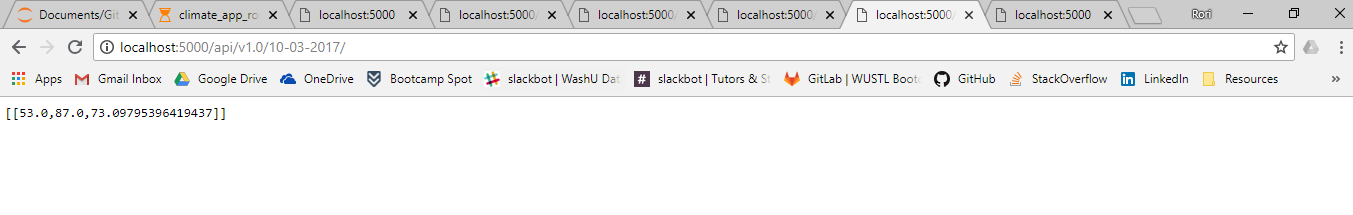

In [42]:
# E
# Query Measurements for provided date range
@app.route('/api/v1.0/<start>/<end>/')
def combined_start_end_stats(start,end):
    q = session.query(func.min(Measurement.tobs),
                      func.max(Measurement.tobs),
                      func.avg(Measurement.tobs))\
                     .filter(Measurement.station == Station.station)\
                     .filter(Measurement.date <= end)\
                     .filter(Measurement.date >= start).all()
    print()
    print(f"Results for Page E:")
    for row in q:
        print()
        print(row)
    return jsonify(q)

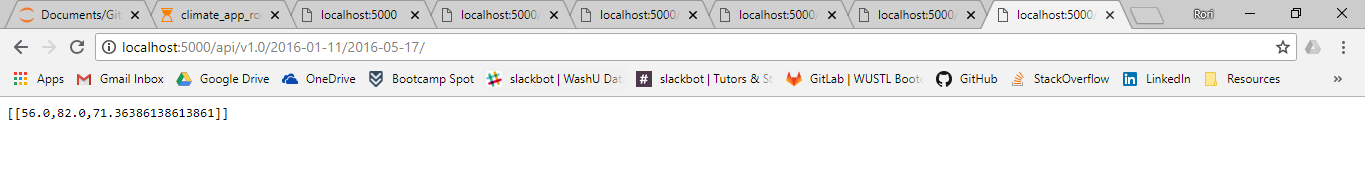

In [ ]:
if __name__ == '__main__':
  #   app.run(debug=True)
    from werkzeug.serving import run_simple
    run_simple('localhost', 5000, app)

 * Running on http://localhost:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Sep/2018 19:45:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2018 19:47:07] "GET /api/v1.0/precipitation/ HTTP/1.1" 200 -



Results for Page A:


127.0.0.1 - - [08/Sep/2018 19:47:53] "GET /api/v1.0/stations/ HTTP/1.1" 200 -



Results for Page B:
USC00511918
USC00513117
USC00514830
USC00516128
USC00517948
USC00518838
USC00519281
USC00519397
USC00519523


127.0.0.1 - - [08/Sep/2018 19:48:23] "GET /api/v1.0/tobs/ HTTP/1.1" 200 -



Results for Page C:


127.0.0.1 - - [08/Sep/2018 19:49:14] "GET /api/v1.0/10-03-2017/ HTTP/1.1" 200 -



Results for Page D:

(53.0, 87.0, 73.09795396419437)


127.0.0.1 - - [08/Sep/2018 19:50:20] "GET /api/v1.0/01-11-2017/05-17-2017/ HTTP/1.1" 200 -



Results for Page E:

(None, None, None)


127.0.0.1 - - [08/Sep/2018 19:50:34] "GET /api/v1.0/01-11-2016/05-17-2016/ HTTP/1.1" 200 -



Results for Page E:

(None, None, None)


127.0.0.1 - - [08/Sep/2018 19:50:37] "GET /api/v1.0/01-11-2016/05-17-2016/ HTTP/1.1" 200 -



Results for Page E:

(None, None, None)


127.0.0.1 - - [08/Sep/2018 19:51:01] "GET /api/v1.0/03-29-2016/05-17-2016/ HTTP/1.1" 200 -



Results for Page E:

(None, None, None)


127.0.0.1 - - [08/Sep/2018 19:51:31] "GET /api/v1.0/2016-01-11/2016-05-17/ HTTP/1.1" 200 -



Results for Page E:

(56.0, 82.0, 71.36386138613861)
